In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
feat = df.describe().transpose().reset_index()

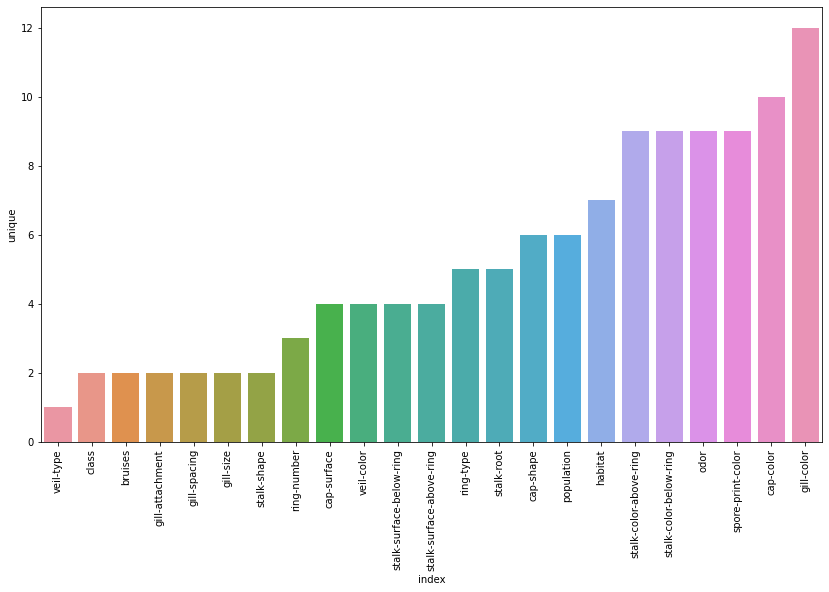

In [7]:
plt.figure(figsize=(14,8))
sns.barplot(data=feat.sort_values('unique'),x='index',y='unique')
plt.xticks(rotation=90);

In [8]:
X = df.drop('class',axis = 1)

In [9]:
X = pd.get_dummies(X,drop_first=True)
y = df['class']
X

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

## AdaBoostClassifier

In [12]:
from sklearn.ensemble import AdaBoostClassifier

In [13]:
model = AdaBoostClassifier(n_estimators=1)

In [14]:
model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=1)

In [15]:
from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score

In [16]:
prediction = model.predict(X_test)

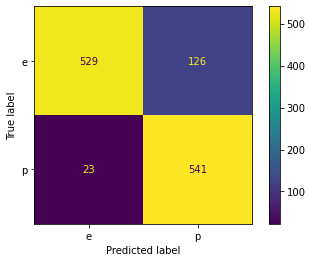

In [17]:
plot_confusion_matrix(model,X_test,y_test)

In [18]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           e       0.96      0.81      0.88       655
           p       0.81      0.96      0.88       564

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.89      0.88      0.88      1219



In [19]:
model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [20]:
model.feature_importances_.argmax()

22

In [21]:
X.columns[22]

'odor_n'

In [22]:
len(X.columns)

95

In [23]:
error_rate = []
for n in range(1,96):
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    err = 1 - accuracy_score(y_test,pred)
    error_rate.append(err)

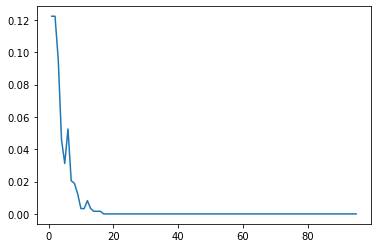

In [24]:
plt.plot(range(1,96),error_rate)

In [25]:
model

AdaBoostClassifier(n_estimators=95)

In [26]:
imp_f = model.feature_importances_

In [27]:
feats = pd.DataFrame(index=X.columns,data=imp_f,columns=['Importance'])

In [28]:
feats

,Importance
cap-shape_c,0.000000
cap-shape_f,0.000000
cap-shape_k,0.000000
cap-shape_s,0.000000
cap-shape_x,0.000000
...,...
habitat_l,0.000000
habitat_m,0.000000
habitat_p,0.000000
habitat_u,0.000000


In [29]:
imp_feat = feats[feats['Importance']>0]

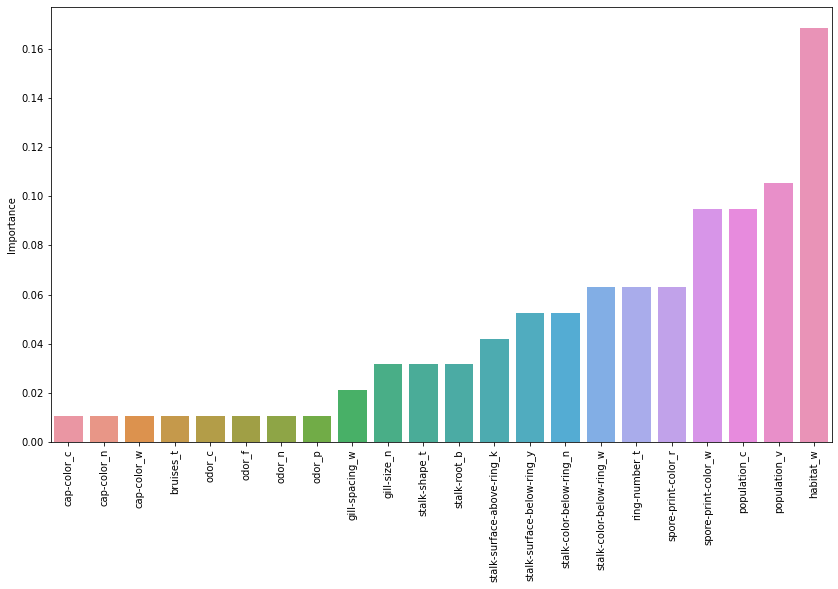

In [30]:
plt.figure(figsize=(14,8))
sns.barplot(data=imp_feat.sort_values('Importance'),x=imp_feat.index,y='Importance')
plt.xticks(rotation=90);

GradientBoostingClassifier:
IMPORTANT PARAMETERS:
n_estimators: default value = 50
learning_rate: default_value = 0.1
max_depth : default_value = 3

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
from sklearn.ensemble import GradientBoostingClassifier

In [34]:
param_grid = {'n_estimators': [50,100],'learning_rate':[0.1,0.05,0.2],'max_depth':[3,4,5]}

In [35]:
gb_model = GradientBoostingClassifier()

In [36]:
grid_model = GridSearchCV(gb_model,param_grid)

In [37]:
grid_model.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [38]:
pred = grid_model.predict(X_test)

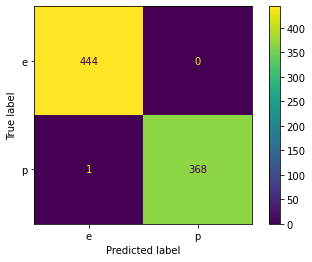

In [39]:
plot_confusion_matrix(grid_model,X_test,y_test)

In [40]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       444
           p       1.00      1.00      1.00       369

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



In [41]:
feat = grid_model.best_estimator_.feature_importances_

In [42]:
imp_feat = pd.DataFrame(index=X.columns,data=feat,columns=['Importance'])

In [43]:
imp_feat

,Importance
cap-shape_c,1.719903e-04
cap-shape_f,9.501098e-16
cap-shape_k,0.000000e+00
cap-shape_s,0.000000e+00
cap-shape_x,0.000000e+00
...,...
habitat_l,0.000000e+00
habitat_m,0.000000e+00
habitat_p,0.000000e+00
habitat_u,2.969977e-18


In [44]:
imp_feat = imp_feat[imp_feat['Importance']>0.0005]

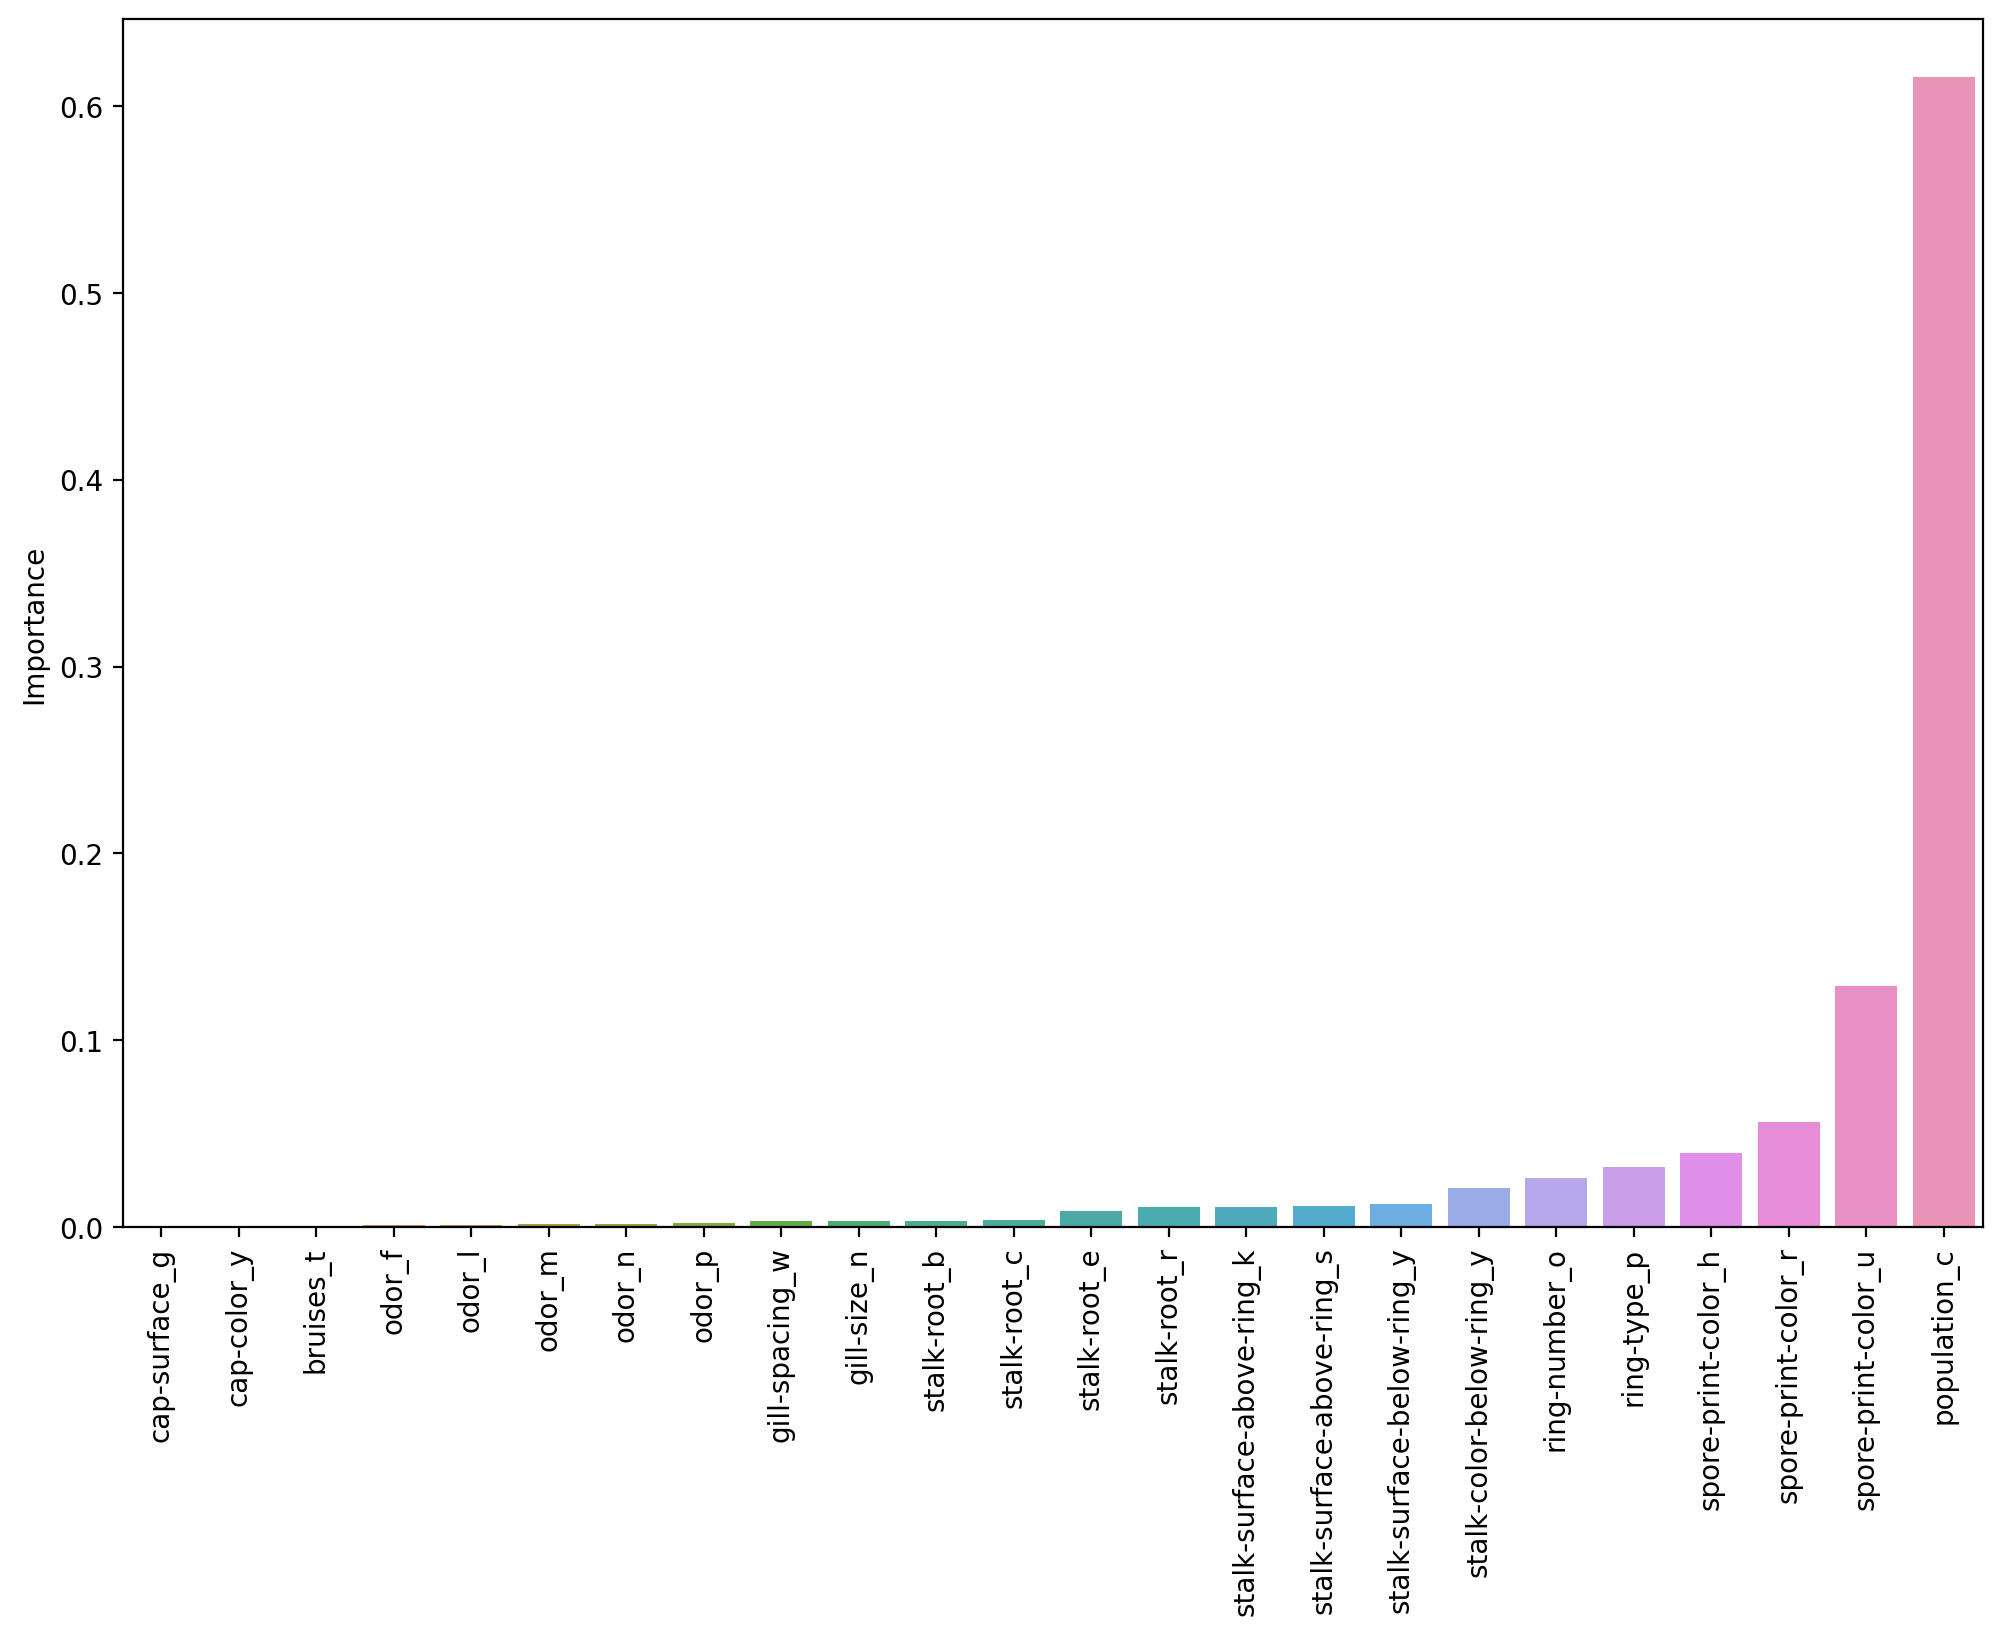

In [45]:
plt.figure(figsize=(12,8),dpi=200)
sns.barplot(data=imp_feat.sort_values('Importance'),x=imp_feat.index,y='Importance')
plt.xticks(rotation=90);